<table align="center" width=100%>
    <tr>
        <td width="20%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week 3)
                    </b>
                </font>
            </div>
        </td>
         <td width="25%">
            <img src="GL-2.png">
        </td>
    </tr>
</table>

### About the data set (Employee data)

The dataset contains information about employees. The aim is to find which employees might undergo attrition.<br> Attribute information: 

**Age:** Age of the employee 

**BusinessTravel:** How much travel is involved in the job for the employee:No Travel, Travel Frequently, Tavel Rarely

**Department:** Department of the employee: Human Resources, Reserach & Development, Sales

**Commute:** Number of miles of daily commute for the employee

**Education:** Employee education field: Human Resources, Life Sciences, Marketing, Medical Sciences, Technical, Others

**EnvironmentSatisfaction:** Satisfaction of employee with office environment

**Gender:** Employee gender

**JobInvolvement:** Job involvement rating

**JobLevel:**  Job level for employee designation

**JobSatisfaction:** Employee job satisfaction rating

**MonthlyIncome:** Employee monthly salary

**OverTime:** Has the employee been open to working overtime: Yes or No

**PercentSalaryHike:** Percent increase in salary

**PerformanceRating:** Overall employee performance rating

**YearsAtCompany:** Number of years the employee has worked with the company

**Attrition:** Employee leaving the company: Yes or No

## Table of Content

1. **[ADABoost](#ada)**
2. **[Gradient Boosting](#gb)**
3. **[Extreme Gradient Boosting (XGBoost)](#xgb)**

**Import the required libraries**

In [1]:
# type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the csv file

In [2]:
# type your code here
data = pd.read_csv('emp_attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,YearsAtCompany
0,33,Yes,Travel_Frequently,Research & Development,3,Life Sciences,1,Male,3,1,Research Scientist,1,3348,1,Yes,11,3,10
1,32,Yes,Travel_Rarely,Sales,4,Medical,4,Male,1,3,Sales Executive,4,10400,1,No,11,3,14
2,40,Yes,Travel_Rarely,Research & Development,9,Life Sciences,4,Male,3,1,Laboratory Technician,1,2018,3,No,14,3,5
3,42,No,Travel_Rarely,Research & Development,7,Medical,2,Female,4,2,Research Scientist,2,2372,6,Yes,16,3,1
4,43,No,Travel_Frequently,Research & Development,27,Life Sciences,3,Female,3,3,Manufacturing Director,1,10820,8,No,11,3,8


In [29]:
data.describe()

,Age,DistanceFromHome,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,YearsAtCompany
count,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.000000,1580.0,1580.000000
mean,34.339241,9.743671,2.648734,2.660127,1.705696,2.668354,4957.425949,2.470886,13.942405,3.0,5.206329
std,8.828037,8.227881,1.107876,0.755176,0.800629,1.105636,3059.158533,2.232193,2.425033,0.0,3.949229
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,11.000000,3.0,0.000000
25%,28.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2571.750000,1.000000,12.000000,3.0,2.000000
50%,33.000000,8.000000,3.000000,3.000000,2.000000,3.000000,4148.000000,1.000000,13.000000,3.0,5.000000
75%,39.000000,16.000000,4.000000,3.000000,2.000000,4.000000,6397.000000,4.000000,16.000000,3.0,8.000000
max,60.000000,29.000000,4.000000,4.000000,4.000000,4.000000,16555.000000,8.000000,19.000000,3.0,18.000000


**Data Preparation**

**Remove the outlier using IQR method, if present.**

In [14]:
# type your code here
def remove_outlier(data,col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    idx = data.index[(data[col] < Q1 - 1.5*IQR) | (data[col] >  Q3 + 1.5*IQR )]
    return idx

In [15]:
data_num = data.select_dtypes(include= np.number)

In [16]:
idx = []
for i in data_num.columns:
    idx.extend(remove_outlier(data_num,i))

In [17]:
idx_set = set(idx)

In [18]:
data_no_outliers = data.drop(index=idx_set)

In [21]:
data_no_outliers.shape

(1487, 18)

**Encode the categorical variables.**

In [34]:
# type your code here
data_encode_cat = pd.get_dummies(data_no_outliers,drop_first= True)

In [47]:
data_encode_cat.shape

(1487, 31)

### Let's begin with some hands-on practice exercises

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Convert the Age variable into categorical by dividing it in the ranges; 18-30, 31-40, 41-50, 51-60.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [41]:
# type your code here
def encode(val):
    if val >=18 and val <=30:
        return 'age1'
    elif val >=31 and val <=40:
        return 'age2'
    elif val >=41 and val <=50:
        return 'age3'
    elif val >=51 and val <=60:
        return 'age4'

In [43]:
data_encode_cat['Age'] = data_encode_cat['Age'].apply(encode)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Employee from which age category has the highest salary?.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot: xlabel='Age', ylabel='MonthlyIncome'>

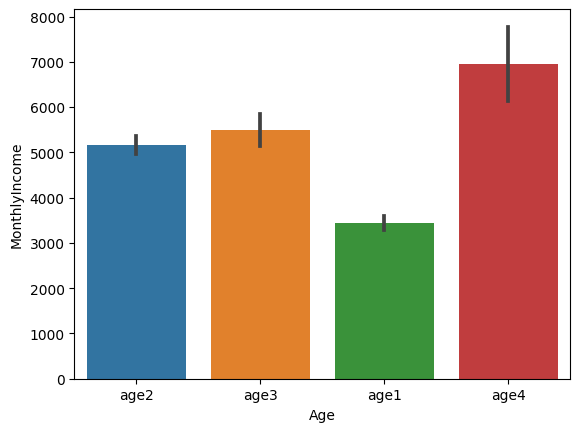

In [44]:
# type your code here
sns.barplot(x=data_encode_cat['Age'],y = data_encode_cat['MonthlyIncome'])

In [49]:
data_encode_cat.shape

(1487, 31)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. Dummy encode the categorical variable "Age".</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [50]:
# type your code here
df_age_encode = pd.get_dummies(data_encode_cat['Age'],drop_first=True)

In [53]:
df_concat = pd.concat((data_encode_cat,df_age_encode),axis =1)

In [62]:
df_clean = df_concat.drop('Age',axis = 1)

In [64]:
df_clean.shape

(1487, 33)

In [65]:
df_clean.isna().sum()

DistanceFromHome                     0
EnvironmentSatisfaction              0
JobInvolvement                       0
JobLevel                             0
JobSatisfaction                      0
MonthlyIncome                        0
NumCompaniesWorked                   0
PercentSalaryHike                    0
PerformanceRating                    0
YearsAtCompany                       0
Attrition_Yes                        0
BusinessTravel_Travel_Frequently     0
BusinessTravel_Travel_Rarely         0
Department_Research & Development    0
Department_Sales                     0
EducationField_Life Sciences         0
EducationField_Marketing             0
EducationField_Medical               0
EducationField_Other                 0
EducationField_Technical Degree      0
Gender_Male                          0
JobRole_Human Resources              0
JobRole_Laboratory Technician        0
JobRole_Manager                      0
JobRole_Manufacturing Director       0
JobRole_Research Director

<a id="ada"> </a>
## 1. ADABoost

## We shall use the employee dataset

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Build a adaboost model with 40 number of estimators to predict whether or not an employee will leave the company based on all the dummy encoded categorical features only. Calculate the accuracy for the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [68]:
# type your code here
col = data.select_dtypes(include=np.number).columns

In [75]:
col_lst = list(col)
col_lst.remove('Age')

In [77]:
x = df_clean.drop(columns=col_lst)
y = df_clean['Attrition_Yes']

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report

In [80]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)
adc = AdaBoostClassifier(n_estimators= 40)
cat_mdl = adc.fit(xtrain,ytrain)

In [82]:
ypred = cat_mdl.predict(xtrain)
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       658
           1       1.00      1.00      1.00       531

    accuracy                           1.00      1189
   macro avg       1.00      1.00      1.00      1189
weighted avg       1.00      1.00      1.00      1189



In [83]:
ypred = cat_mdl.predict(xtest)
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       157
           1       1.00      1.00      1.00       141

    accuracy                           1.00       298
   macro avg       1.00      1.00      1.00       298
weighted avg       1.00      1.00      1.00       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Build a adaboost full model with 40 number of estimators to predict if an employee will leave the company. Generate a classification report.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
# type your code here
x = df_clean.drop('Attrition_Yes',axis = 1)
y = df_clean['Attrition_Yes']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8)
adc = AdaBoostClassifier(n_estimators= 40)
full_mdl = adc.fit(xtrain,ytrain)

In [170]:
ypred = full_mdl.predict(xtrain)
print(classification_report(ytrain,ypred))

              precision    recall  f1-score   support

           0       0.80      0.82      0.81       647
           1       0.78      0.76      0.77       542

    accuracy                           0.79      1189
   macro avg       0.79      0.79      0.79      1189
weighted avg       0.79      0.79      0.79      1189



In [171]:
ypred_test = full_mdl.predict(xtest)
print(classification_report(ytest,ypred_test))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76       168
           1       0.68      0.72      0.70       130

    accuracy                           0.73       298
   macro avg       0.73      0.73      0.73       298
weighted avg       0.73      0.73      0.73       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6.  Find the area under the receiver operating characteristic curve for full model built in question 5. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [172]:
# type your code here
from sklearn.metrics import roc_curve

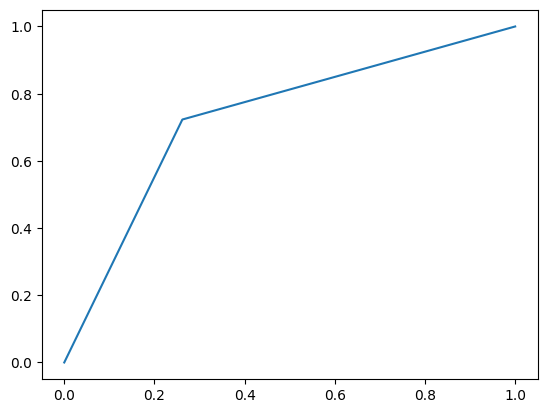

In [173]:
fpr,tpr,threshod = roc_curve(ytest,ypred_test)
plt.plot(fpr,tpr)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. Plot a confusion matrix for the full model built above.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [174]:
# type your code here
from sklearn.metrics import confusion_matrix

In [175]:
confusion_matrix(ytest,ypred_test)

array([[124,  44],
       [ 36,  94]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. Calculate the specificity, sensitivity, % of misclassified and correctly classified observations. What can you say about the model by looking at the sensitivity and specificity values? Is this a good model?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [164]:
# type your code here
from sklearn.metrics import recall_score,precision_score

In [176]:
recall_score(ytest,ypred_test)

0.7230769230769231

In [177]:
precision_score(ytest,ypred_test)

0.6811594202898551

In [184]:
#misclassified
total_misclassified = confusion_matrix(ytest,ypred_test)[0][1] + confusion_matrix(ytest,ypred_test)[1][0]
total_obs = ytest.shape[0]
per_missclas = (total_misclassified / total_obs) * 100
print(per_missclas)

26.845637583892618


In [185]:
#correctly classified
total_classified = confusion_matrix(ytest,ypred_test)[0][0] + confusion_matrix(ytest,ypred_test)[1][1]
total_obs = ytest.shape[0]
per_class = (total_classified / total_obs) * 100
print(per_class)

73.15436241610739


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. Find the best value of hyperparameters "n_estimators" and "learning_rate" for the adaboost full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

       n_estimators = [100, 120, 150, 200, 250, 300, 350],
       learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015]         

In [115]:
from sklearn.model_selection import GridSearchCV

In [116]:
# type your code here
adc = AdaBoostClassifier()
params = {'n_estimators':[100, 120, 150, 200, 250, 300, 350],
          'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015]}
gsv_mdl = GridSearchCV(adc,param_grid=params)
mdl_tun =  gsv_mdl.fit(xtrain,ytrain)

In [123]:
mdl_tun.best_params_

{'learning_rate': 0.15, 'n_estimators': 350}

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>10. Build a adaboost model using the tuned hyperparameters, perform 10 fold cross validation and get the average ROC-AUC score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [117]:
# type your code here
from sklearn.model_selection import cross_val_score

In [124]:
adc = AdaBoostClassifier(n_estimators= 350,learning_rate= 0.15)
adc_tuned = adc.fit(xtrain,ytrain)

In [125]:
cross_val_score(adc_tuned,xtrain,ytrain,scoring='roc_auc',cv = 10).mean()

0.8383592089252467

In [126]:
cross_val_score(adc_tuned,xtest,ytest,scoring='roc_auc',cv = 10).mean()

0.7679157239819004

In [120]:
import sklearn
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_

<a id="gb"> </a>
## 2. Gradient Boosting

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>11. Build the gradient boosting model 100 estimators and maximum depth 3. Also, find the accuracy score.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [130]:
# type your code here
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [128]:
gbc = GradientBoostingClassifier(n_estimators= 100,max_depth=3)
gbc_full = gbc.fit(xtrain,ytrain)

In [132]:
ypred_train = gbc_full.predict(xtrain)
ypred_test = gbc_full.predict(xtest)

In [131]:
accuracy_score(ytrain,ypred_train)

0.9276703111858705

In [133]:
accuracy_score(ytest,ypred_test)

0.8657718120805369

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>12. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150, 200, 250, 300, 350],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        max_depth = [2, 3, 4, 5, 6]

In [134]:
# type your code here
params = {'n_estimators':[100, 120, 150, 200, 250, 300, 350],
          'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
         'max_depth':[2, 3, 4, 5, 6]}
gsv_mdl = GridSearchCV(gbc,param_grid=params)
mdl_tun =  gsv_mdl.fit(xtrain,ytrain)

In [135]:
mdl_tun.best_params_

{'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300}

In [136]:
gdc = GradientBoostingClassifier(n_estimators= 300,max_depth= 6,learning_rate=0.1)
gdc_tuned = gdc.fit(xtrain,ytrain)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>13. Build the gradient boosting model and an adaboost model with their best parameters and generate a classification report for both of them. Which model is the best and why?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [138]:
# type your code here
ytest_pred_gdc = gdc_tuned.predict(xtest)
print(classification_report(ytest,ytest_pred_gdc))

              precision    recall  f1-score   support

           0       0.99      0.88      0.93       162
           1       0.87      0.99      0.93       136

    accuracy                           0.93       298
   macro avg       0.93      0.93      0.93       298
weighted avg       0.94      0.93      0.93       298



In [139]:
ytest_pred_adc = adc_tuned.predict(xtest)
print(classification_report(ytest,ytest_pred_adc))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       162
           1       0.76      0.75      0.75       136

    accuracy                           0.78       298
   macro avg       0.77      0.77      0.77       298
weighted avg       0.78      0.78      0.78       298



<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Plot the area under the receiver operating characteristic curve for tuned gradient boosting model built in question 13. Also plot a confusion matrix.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

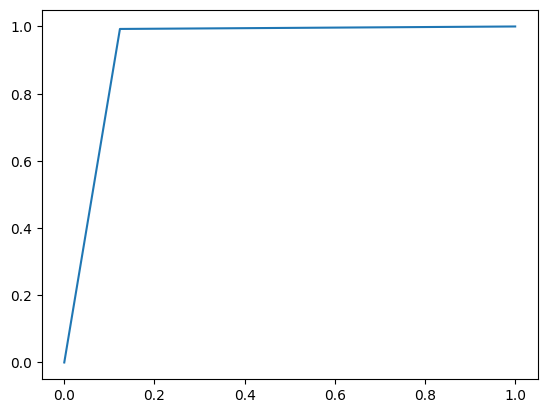

In [141]:
# type your code here
fpr,tpr,threshod = roc_curve(ytest,ytest_pred_gdc)
plt.plot(fpr,tpr)
plt.show()

In [142]:
confusion_matrix(ytest,ytest_pred_gdc)

array([[142,  20],
       [  1, 135]], dtype=int64)

<a id="xgb"> </a>
## 3. Extreme Gradient Boosting (XGBoost)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Build the XGBoost model with a learning rate of 0.01 and gamma equal to 2. Calculate the roc_auc score and generate a classification rerport.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [143]:
# type your code here
from xgboost import XGBClassifier 

In [144]:
xgbc = XGBClassifier(learning_rate = 0.01, gamma = 2)

In [145]:
xgbc_mdl = xgbc.fit(xtrain,ytrain)

In [146]:
ypred_xgbc = xgbc_mdl.predict(xtest)
print(classification_report(ytest,ypred_xgbc))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       162
           1       0.82      0.83      0.82       136

    accuracy                           0.84       298
   macro avg       0.84      0.84      0.84       298
weighted avg       0.84      0.84      0.84       298



In [147]:
from sklearn.metrics import roc_auc_score

In [148]:
roc_auc_score(ytest,ypred_xgbc)

0.8382806826434278

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>16. Find the best value of hyperparameters "n_estimators", "learning_rate" and "max_depth" for the extreme gradient boosting full model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Given list of values:

        n_estimators = [100, 120, 150],
        learning_rate = [0.1, 0.01, 0.001, 0.15, 0.015], 
        gamma = [2, 3, 4, 5, 6],
        max_depth = [2, 3, 4, 5, 6]

In [149]:
# type your code here
xgbc = XGBClassifier()
params = {'n_estimators':[100, 120, 150],
          'learning_rate': [0.1, 0.01, 0.001, 0.15, 0.015],
         'max_depth':[2, 3, 4, 5, 6],
         'gamma':[2, 3, 4, 5, 6]}
gsv_mdl = GridSearchCV(xgbc,param_grid=params)
mdl_tun =  gsv_mdl.fit(xtrain,ytrain)

In [150]:
mdl_tun.best_params_

{'gamma': 2, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 100}

In [152]:
xgbc_tun = XGBClassifier(n_estimators = 100,gamma = 2,learning_rate = 0.1,max_depth = 6)
xgbc_tun_mdl = xgbc_tun.fit(xtrain,ytrain)

In [153]:
ypred_xgbc_tun_test = xgbc_tun.predict(xtest)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>17. Plot the connfusion matrix for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [154]:
# type your code here
confusion_matrix(ytest,ypred_xgbc_tun_test)

array([[141,  21],
       [  5, 131]], dtype=int64)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>18. Plot the area under the receiver operating characteristic curve for tuned extreme gradient boosting model built in question 16.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

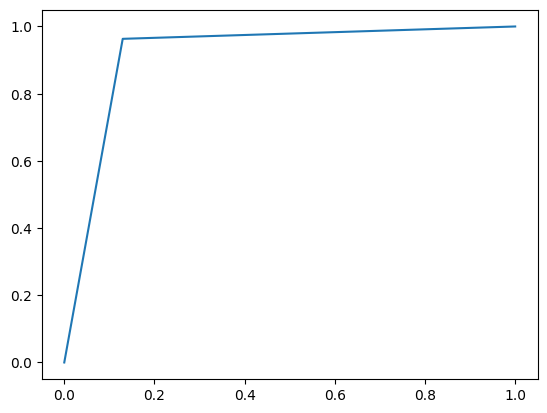

In [155]:
# type your code here
fpr,tpr,threshod = roc_curve(ytest,ypred_xgbc_tun_test)
plt.plot(fpr,tpr)
plt.show()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>19. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Adaboost model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [157]:
from sklearn.tree import DecisionTreeClassifier

In [158]:
from sklearn.ensemble import StackingClassifier,RandomForestClassifier

In [160]:
# type your code here
# consider the various algorithms as base learners
base_learners = [('dc_mdl',DecisionTreeClassifier()) ,
                 ('rf_mdl',RandomForestClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = AdaBoostClassifier())

# fit the model on train dataset
stck_mdl = stack_model.fit(xtrain, ytrain)

In [161]:
ypred_stck = stck_mdl.predict(xtest)

In [162]:
roc_auc_score(ytest,ypred_stck)

0.9870642701525054

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>20. Use the stacking technique with the decision tree and Random Forest model as base learners. Consider the Gradient Boosting model as a final estimator. Also, compute the ROC-AUC score of the model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [163]:
# type your code here
# consider the various algorithms as base learners
base_learners = [('dc_mdl',DecisionTreeClassifier()) ,
                 ('rf_mdl',RandomForestClassifier())]

# initialize stacking classifier 
# pass the base learners to the parameter, 'estimators'
# pass the Naive Bayes model as the 'final_estimator'/ meta model
stack_model = StackingClassifier(estimators = base_learners, final_estimator = GradientBoostingClassifier())

# fit the model on train dataset
stck_mdl = stack_model.fit(xtrain, ytrain)
ypred_stck = stck_mdl.predict(xtest)
roc_auc_score(ytest,ypred_stck)

0.979121278140886